In [5]:
%load_ext autoreload
%autoreload 2

import os, sys
import pandas as pd
import numpy as np
import glob
import pickle
import matplotlib.pyplot as plt
%matplotlib inline  
from matplotlib.pyplot import get_cmap

src_dir = os.path.abspath(os.path.join(os.pardir,'src'))
sys.path[0] = src_dir

from analysis.density import cdf_dist_arrid_vec

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load factor scores (positions in 5D-space)

In [3]:
# factor scores
path_read = os.path.join(src_dir,os.pardir,'data_filter')
fname_read = 'ipip300-no0_arr_pd_neoac_score-1.npy'
filename = os.path.join(path_read,fname_read)
arr_pd =  np.load(filename)

## z-score the data
N_,D_ = np.shape(arr_pd)
for d in range(D_):
    x_tmp = arr_pd[:,d]
    x_mu = np.mean(x_tmp)
    x_std = np.std(x_tmp)
    arr_pd[:,d] = (x_tmp - x_mu)/x_std
    

# Specify location of types

In [7]:
x0 = np.array([-0.70, 0.52, 0.23, 0.62, 0.78]) ## Role Model type
x1 = np.array([-0.23, 0.70, -0.75, -0.56, -0.44]) ## Self-centered type
x2 = np.array([-0.54, -0.07, -0.77, 0.12, 0.19]) ## Reserved type
x3 = np.array([ 0.55, 0.51, -0.60, 0.25, 0.25]) ## Average type

list_types = ['Role Model','Self-centered','Reserved','Average']
list_inds = [0,1,2,3]
list_xi = [x0,x1,x2,x3]

# Count the number of respondents for each type

We count the number of respondents in a 5D-sphere around each type for the original data and the randomized data.

We vary the radius.
Note that the average distance between nearest neighbors is $\approx 0.2$; thus for small distances, say $<0.5$ we have very few observations.

/home/martin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in true_divide
/home/martin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in true_divide
/home/martin/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


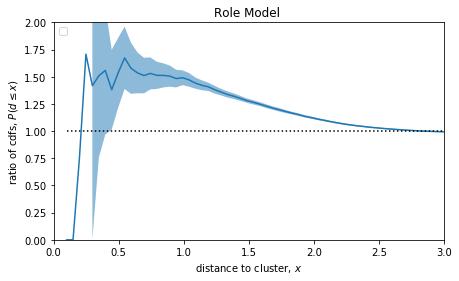

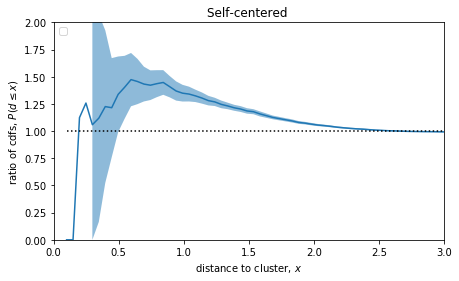

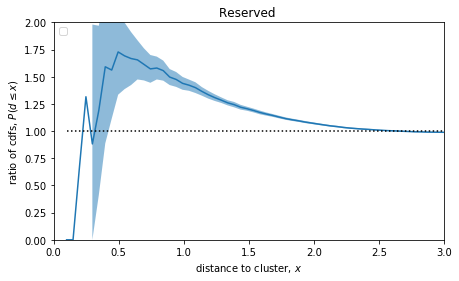

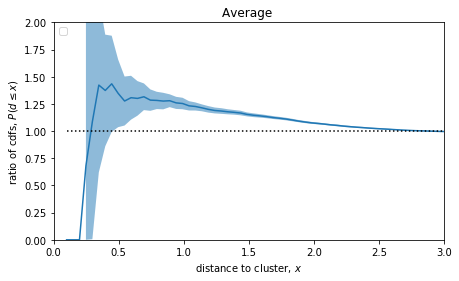

In [10]:
d_min = 0.1
d_max = 5.0# np.max(arr_p_dist)
N_d = 100
arr_d = np.linspace(d_min,d_max,N_d)

n_boot = 100
n_rand = 100

for i,ind_i in enumerate(list_inds):
    x_vec = list_xi[i]
    type_i = list_types[i]

#     x_vec = x0
    arr_p, arr_p_rand, arr_p_boot = cdf_dist_arrid_vec(arr_pd, x_vec, arr_d , n_rand, n_boot)
    
    ## cumulative distribution of fraction of ponts with distance <= x
    ## true data and randomized data
    n_std = 2

    f = plt.figure(figsize=(7,4))
    plt.clf()
    ax = f.add_subplot(111)

    ## original data + bootstrap
    x = arr_d
    y = arr_p
    
#     ax.plot(x,y,label='original data')

    yerr = n_std*np.std(arr_p_boot,axis=0)
    y1 = np.maximum(0.0*y,y - yerr)
    y2 = y + yerr
#     ax.fill_between(x,y1,y2,alpha=0.5)

    ## randomized data
    x = arr_d
    y = np.mean(arr_p_rand,axis=0)
    yerr = np.std(arr_p_rand,axis=0)
#     ax.plot(x,y,label='randomized data')

    y1 = np.maximum(0.0*y,y - yerr)
    y2 = y + yerr
#     ax.fill_between(x,y1,y2,alpha=0.5)


    x = arr_d
    y = arr_p/np.mean(arr_p_rand,axis=0)
    yerr = n_std*np.std(  arr_p_boot/arr_p_rand ,axis=0)
    ax.plot(x,y)
    y1 = np.maximum(0.0*y,y - yerr)
    y2 = y + yerr
    ax.fill_between(x,y1,y2,alpha=0.5)
    ax.plot(x,1.0+0.0*x,color='black',ls=':')
    
    
    ax.set_title('%s '%(type_i))

    ax.legend(loc='upper left')
    ax.set_xlabel('distance to cluster, $x$')
    ax.set_ylabel(r'ratio of cdfs, $P(d \leq x)$ ')
    # plt.xscale('log')
#     ax.set_yscale('log')
    ax.set_ylim(0,2)
    ax.set_xlim(0,3)

#     ax_in = plt.axes([0.5, 0.25, .35, .35])
    # ax = f.add_subplot(122)


#     ax_in.set_title('ratio of cdfs')
#     # ax_in.set_xlabel('distance to cluster, $x$')
#     ax_in.set_ylim(0,2)
#     ax_in.set_xlim(0,3)

#     path_save = ''
#     fname_save = 'clusters-density-%s_nboot%s_nrand%s_inset.png'%(type_i,n_boot,n_rand)
#     filename = os.path.join(path_save,fname_save)
#     plt.savefig(filename,dpi=300)

In [11]:
## an older version of the plot with insets

# d_min = 0.1 # minimum radius
# d_max = 5.0 # maximum radius 
# N_d = 100 ## how many points to sample from min to max radius
# arr_d = np.linspace(d_min,d_max,N_d)

# n_boot = 100 ## number of (non-randomized) bootstrap samples
# n_rand = 100 ## number of randomized samples

# for i,ind_i in enumerate(list_inds):
#     x_vec = list_xi[i]
#     type_i = list_types[i]

# #     x_vec = x0
#     arr_p, arr_p_rand, arr_p_boot = cdf_dist_arrid_vec(arr_pd, x_vec, arr_d , n_rand, n_boot)
    
#     ## cumulative distribution of fraction of ponts with distance <= x
#     ## true data and randomized data
#     n_std = 2

#     f = plt.figure(figsize=(7,4))
#     plt.clf()
#     ax = f.add_subplot(111)

#     ## original data + bootstrap
#     x = arr_d
#     y = arr_p
#     ax.plot(x,y,label='original data')

#     yerr = n_std*np.std(arr_p_boot,axis=0)
#     y1 = np.maximum(0.0*y,y - yerr)
#     y2 = y + yerr
#     ax.fill_between(x,y1,y2,alpha=0.5)

#     ## randomized data
#     x = arr_d
#     y = np.mean(arr_p_rand,axis=0)
#     yerr = np.std(arr_p_rand,axis=0)
#     ax.plot(x,y,label='randomized data')

#     y1 = np.maximum(0.0*y,y - yerr)
#     y2 = y + yerr
#     ax.fill_between(x,y1,y2,alpha=0.5)


#     ax.set_title('%s '%(type_i))

#     ax.legend(loc='upper left')
#     ax.set_xlabel('distance to cluster, $x$')
#     ax.set_ylabel(r'cdf, $P(d \leq x)$ ')
#     # plt.xscale('log')
#     ax.set_yscale('log')
#     ax.set_ylim(10**(-5),1)
#     ax.set_xlim(0,3)

#     ax_in = plt.axes([0.5, 0.25, .35, .35])
#     # ax = f.add_subplot(122)
#     x = arr_d
#     y = arr_p/np.mean(arr_p_rand,axis=0)
#     yerr = n_std*np.std(  arr_p_boot/arr_p_rand ,axis=0)
#     ax_in.plot(x,y)
#     y1 = np.maximum(0.0*y,y - yerr)
#     y2 = y + yerr
#     ax_in.fill_between(x,y1,y2,alpha=0.5)
#     ax_in.plot(x,1.0+0.0*x,color='black',ls=':')

#     ax_in.set_title('ratio of cdfs')
#     # ax_in.set_xlabel('distance to cluster, $x$')
#     ax_in.set_ylim(0,2)
#     ax_in.set_xlim(0,3)

# #     path_save = ''
# #     fname_save = 'clusters-density-%s_nboot%s_nrand%s.png'%(type_i,n_boot,n_rand)
# #     filename = os.path.join(path_save,fname_save)
# #     plt.savefig(filename,dpi=300)